In [1]:
path="bank_1.csv"

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
selected_col=['default','housing','loan','deposit']
selected_col

['default', 'housing', 'loan', 'deposit']

In [7]:
for col in selected_col:
    data[col]=data[col].map({"yes":1,"no":0})

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [9]:
data=pd.get_dummies(data,columns=['job','marital','education','contact','month','poutcome'],drop_first=True,dtype="int64")
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [10]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
x=data.drop(["deposit"],axis=1)
y=data["deposit"]
x.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=2,shuffle=True)
print(f"x_train is {x_train.shape}")
print(f"x_test is {x_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

x_train is (8929, 43)
x_test is (2233, 43)
y_train is (8929,)
y_test is (2233,)


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
bank_rf=RandomForestClassifier()
bank_rf

RandomForestClassifier()

In [16]:
bank_rf.fit(x_train,y_train)
y_predict=bank_rf.predict(x_test)

In [17]:
y_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
select_model = [LogisticRegression(), 
              DecisionTreeClassifier(max_depth=None,min_samples_leaf=10,min_samples_split=10), 
              RandomForestClassifier(max_depth=None,min_samples_leaf=10,min_samples_split=10,n_estimators=350)]
#max_depth=None,min_samples_leaf=10,min_samples_split=10,n_estimators=350

In [22]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
acc=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"accuracy(accuracy_score(y_pred,y_test))nof model is {model}")
    acc.append(accuracy_score(y_pred,y_test))
    print(acc)

accuracy(accuracy_score(y_pred,y_test))nof model is LogisticRegression()
[0.8652037617554859]
accuracy(accuracy_score(y_pred,y_test))nof model is DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
[0.8652037617554859, 1.0]
accuracy(accuracy_score(y_pred,y_test))nof model is RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       n_estimators=350)
[0.8652037617554859, 1.0, 1.0]


In [24]:
result=[acc]
result

[[0.8652037617554859, 1.0, 1.0]]

In [25]:
pd.DataFrame(data=result,columns=["LR","DTC","RF"],index=["accuracy"])

,LR,DTC,RF
accuracy,0.865204,1.0,1.0


In [26]:
rf=RandomForestClassifier ()
rf

RandomForestClassifier()

In [27]:
##param_grid={
#'n_estimators': [350,400,450,500], # number of tree in the forest 
#'max_depth': [None, 10,20,30],# Maximum depth of he tree
#'min_samples_split': [10,12,15,20], # Minimum number of sample required to split an internal node
#'min_samples_leaf':[10,12,15,20],# Minimum number of samples required to be at leaf mode
#}

In [28]:
#from sklearn.model_selection import GridSearchCV
#grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#njobs-1 for faster computation / parallization?

#fit the model with differen hyer parameters combinations
#best_params =grid_search.best_params_
#best_model =grid_search.best_estimator_

In [29]:
##best_params

NameError: name 'best_params' is not defined

## Random Hyper Parameters ##
#DecisionTreeClassifier(max_depth=10,min_samples_leaf=25,min_samples_split=100), 
#RandomForestClassifier(max_depth=21,min_samples_leaf=21,min_samples_split=80,n_estimators=10)

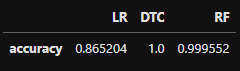

## Grid Search Hyper Parameters ##
#DecisionTreeClassifier(max_depth=None,min_samples_leaf=10,min_samples_split=10), 
#RandomForestClassifier(max_depth=None,min_samples_leaf=10,min_samples_split=10,n_estimators=350)

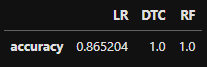

In [30]:
import pickle
pickle.dump(bank_rf,open("mymodel.pkl","wb"))